In [1]:
import pandas as pd
import numpy as np
import pickle

%matplotlib inline
import matplotlib.pyplot as plt

# Read data from disk

In [2]:
house_prices_reg = pd.read_csv('boston_house_prices_regression.csv')
house_prices_reg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,y
0,0.04981,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43,-1.0,22.507577,27.08,19.40,23.4
1,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,-1.0,16.238796,17.46,16.55,8.1
2,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38,-1.0,27.423950,21.84,28.20,22.0
3,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44,-1.0,20.939772,10.50,28.20,15.0
4,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64,-1.0,11.319594,14.70,10.20,10.4


In [3]:
titanic_clf = pd.read_csv('titanic_classification.csv')
titanic_clf.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Emb_C,Emb_Q,Emb_S,Survived
0,3,0,22.0,1,0,7.2500,0,0,1,0
1,1,0,38.0,1,0,71.2833,1,0,0,1
2,3,0,26.0,0,0,7.9250,0,0,1,1
3,1,0,35.0,1,0,53.1000,0,0,1,1
4,3,0,35.0,0,0,8.0500,0,0,1,0


# Load the models required for this notebook

In [4]:
with open('../Saved Models/stacked_linear_regression.pkl', 'rb') as f:
    reg = pickle.load(f)
    
with open('../Saved Models/random_forest_clf.pkl', 'rb') as f:
    rf = pickle.load(f)

/Users/ashish.jha/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/ashish.jha/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.20.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


# Exercise 1: Calculating MAE & RMSE

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [6]:
X = house_prices_reg.drop(columns=['y'])
y = house_prices_reg['y'].values

y_pred = reg.predict(X)

In [7]:
print('Mean Absolute Error = {}'.format(mean_absolute_error(y, y_pred)))
print('Root Mean Squared Error = {}'.format(sqrt(mean_squared_error(y, y_pred))))
print('R Squared Score = {}'.format(r2_score(y, y_pred)))

Mean Absolute Error = 2.874084343939713
Root Mean Squared Error = 4.504583979080911
R Squared Score = 0.7634986504091821


# Exercise 2: Calculating Accuracy, Precision, Recall

In [8]:
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                             recall_score, f1_score, precision_recall_curve)

In [9]:
X = titanic_clf.iloc[:, :-1].values
y = titanic_clf.iloc[:, -1].values

y_pred = rf.predict(X)
y_pred_probs = rf.predict_proba(X)[:, 1]

In [10]:
print('Accuracy Score = {}'.format(accuracy_score(y, y_pred)))

Accuracy Score = 0.6251402918069585


In [11]:
print(confusion_matrix(y_pred=y_pred, y_true=y))

[[548   1]
 [333   9]]


In [12]:
print('Precision Score = {}'.format(precision_score(y, y_pred)))
print('Recall Score = {}'.format(recall_score(y, y_pred)))

Precision Score = 0.9
Recall Score = 0.02631578947368421


In [13]:
print('F1 Score = {}'.format(f1_score(y, y_pred)))

F1 Score = 0.05113636363636364


# Exercise 4: k-Fold Cross Validation with Stratified Sampling

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [15]:
X = titanic_clf.iloc[:, :-1].values
y = titanic_clf.iloc[:, -1].values

skf = StratifiedKFold(n_splits=5)

In [16]:
scores = []

for train_index, val_index in skf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    rf_skf = RandomForestClassifier(**rf.get_params())
    
    rf_skf.fit(X_train, y_train)
    y_pred = rf_skf.predict(X_val)
    
    scores.append(accuracy_score(y_val, y_pred))
    
scores

[0.6145251396648045,
 0.6983240223463687,
 0.7471910112359551,
 0.7808988764044944,
 0.711864406779661]

In [17]:
print('Mean Accuracy Score = {}'.format(np.mean(scores)))

Mean Accuracy Score = 0.7105606912862568


# Exercise 4: Hyperparameter tuning with Random Search

In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [19]:
X = titanic_clf.iloc[:, :-1].values
y = titanic_clf.iloc[:, -1].values

rf_rand = RandomForestClassifier()

In [20]:
def report(results, max_rank=3):
    for rank in range(1, max_rank+1):
        results_at_rank = np.flatnonzero(results['rank_test_score'] == i)

In [21]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [22]:
param_dist = {"n_estimators": list(range(10,210,10)),
              "max_depth": list(range(3,20)),
              "max_features": list(range(1, 10)),
              "min_samples_split": list(range(2, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [23]:
n_iter_search = 60
random_search = RandomizedSearchCV(rf_rand, param_distributions=param_dist, scoring='accuracy',
                                   n_iter=n_iter_search, cv=5)
random_search.fit(X, y)

/Users/ashish.jha/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [24]:
results = pd.DataFrame(random_search.cv_results_).sort_values('rank_test_score')
for i, row in results.head().iterrows():
    print("Model rank: {}".format(row.rank_test_score))
    print("Mean validation score: {:.3f} (std: {:.3f})".format(row.mean_test_score, row.std_test_score))
    print("Model Hyperparameters: {}\n".format(row.params))

Model rank: 1
Mean validation score: 0.723 (std: 0.038)
Model Hyperparameters: {'n_estimators': 80, 'min_samples_split': 10, 'max_features': 1, 'max_depth': 9, 'criterion': 'entropy', 'bootstrap': True}

Model rank: 2
Mean validation score: 0.721 (std: 0.048)
Model Hyperparameters: {'n_estimators': 60, 'min_samples_split': 4, 'max_features': 2, 'max_depth': 7, 'criterion': 'gini', 'bootstrap': True}

Model rank: 3
Mean validation score: 0.718 (std: 0.054)
Model Hyperparameters: {'n_estimators': 170, 'min_samples_split': 6, 'max_features': 3, 'max_depth': 6, 'criterion': 'entropy', 'bootstrap': False}

Model rank: 3
Mean validation score: 0.718 (std: 0.039)
Model Hyperparameters: {'n_estimators': 40, 'min_samples_split': 9, 'max_features': 6, 'max_depth': 9, 'criterion': 'gini', 'bootstrap': True}

Model rank: 5
Mean validation score: 0.717 (std: 0.039)
Model Hyperparameters: {'n_estimators': 160, 'min_samples_split': 10, 'max_features': 1, 'max_depth': 17, 'criterion': 'entropy', 'boot

In [25]:
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.723 (std: 0.038)
Parameters: {'n_estimators': 80, 'min_samples_split': 10, 'max_features': 1, 'max_depth': 9, 'criterion': 'entropy', 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.721 (std: 0.048)
Parameters: {'n_estimators': 60, 'min_samples_split': 4, 'max_features': 2, 'max_depth': 7, 'criterion': 'gini', 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.718 (std: 0.054)
Parameters: {'n_estimators': 170, 'min_samples_split': 6, 'max_features': 3, 'max_depth': 6, 'criterion': 'entropy', 'bootstrap': False}

Model with rank: 3
Mean validation score: 0.718 (std: 0.039)
Parameters: {'n_estimators': 40, 'min_samples_split': 9, 'max_features': 6, 'max_depth': 9, 'criterion': 'gini', 'bootstrap': True}



# Exercise 5: Feature importance using Random Forest

In [26]:
feat_imps = pd.DataFrame({'importance': rf.feature_importances_}, index=titanic_clf.columns[:-1])
feat_imps.sort_values(by='importance', ascending=False, inplace=True)

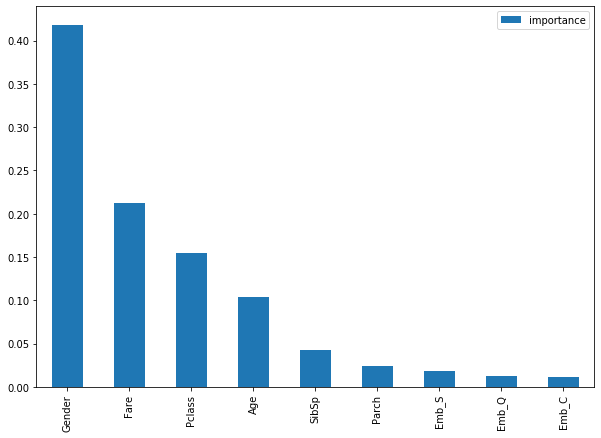

In [27]:
feat_imps.plot(kind='bar', figsize=(10,7))

plt.legend()
plt.show()